# Part II - Ford GO Dataset Analysis 
## by Ayorinde A. Asiru

## Dataset Overview

### The dataset includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area of the ford gobike for the month of February 2018. It comprises of 183412 rows and 16 columns. The information in the dataset include:

> Trip Duration (seconds)

> Start Time and Date

> End Time and Date

> Start Station ID

> Start Station Name

> Start Station Latitude

> Start Station Longitude

> End Station ID

> End Station Name

> End Station Latitude


> End Station Longitude

> Bike ID

> User Type 

> Member Year of Birth

> Member Gender

> Bike Share for all Trip.


## Investigation Overview

The analysis of this dataset was carried out to identify the key factors that explain the duration of trip taken by the users 
of the company services. The dataset was intially visullay and programmatically assessed to determine the extent of cleaning that 
is necessary to work with the dataset. Rows with incomplete data were dropped bringing the total number of rows analysed to 174592 
rows of data. 
The distribution of the categeories of users and the age of users of the company's service was explored using a bar chart. 
The distribution of the duration of the ride was explored using a histogram however, the cluster was huge for duration lesser than
10000s, therefore a log transformation was applied on the x-axis (duration). This revealed a uniform distribution for the duration 
of the ride. 
The duration of rides during the various hours of the day was analysed using a barchat.
Further exploration was done to investigate the relationship between the age of the user, the gender and the duration of the trip. 


### Key insights of the presentation

#### For the company, the Subscribers number about 160,000 while customers are around 20,000. Subscriber to customer ratio is about 8:1
#### The distribution of both customers and users follow similar trend with the largest range accounted for by the age group 23 - 32
#### The distribution of the duration of the trip is unimodal and right skewed with a peak around 600s.
#### Younger users between age 20 and 60 tend to take longer trip than older users
#### Male user between the age 20 and 55 tend to take longer trips the other two genders
#### The distribution of the number of rides by the starting hour is bimodal.
#### The trend of duration of trip does not significant differ across sharing of trips or gender. However, duration of trips decreases with increasing age in all categories

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
bikedata1 = pd.read_csv('201902-fordgobike-tripdataclean.csv')

In [3]:
color = sb.color_palette()[0]

# DISTRIBUTION OF USERS 
## For the company, the Subscribers number about 160,000 while customers are around 20,000. Subscriber to customer ratio is about 8:1

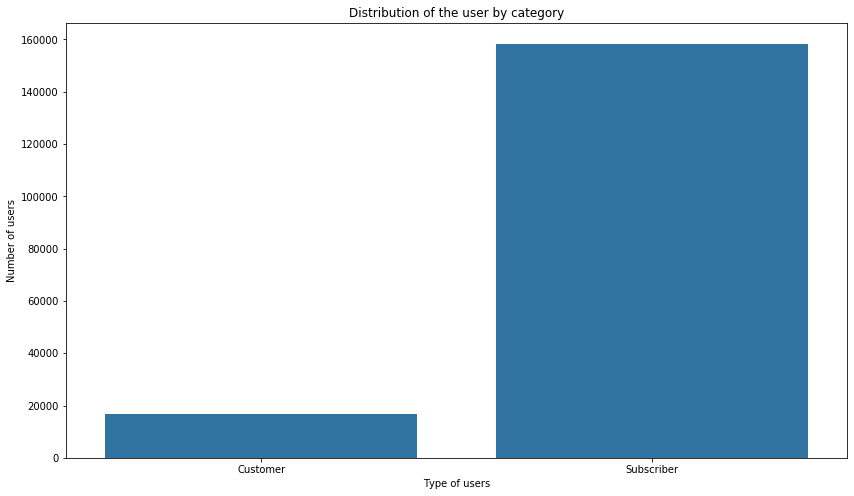

In [4]:
plt.figure(figsize =[14,8])
sb.countplot(data = bikedata1, x ='user_type', color =color)
plt.xlabel('Type of users')
plt.ylabel('Number of users')
plt.title('Distribution of the user by category');

## DISTRIBUTION OF USERS BY AGE
### The distribution of both customers and users follow similar trend with the largest range accounted for by the age group 23 - 32
### The modal age for subscribers is 30 while the modal age for customers is 29

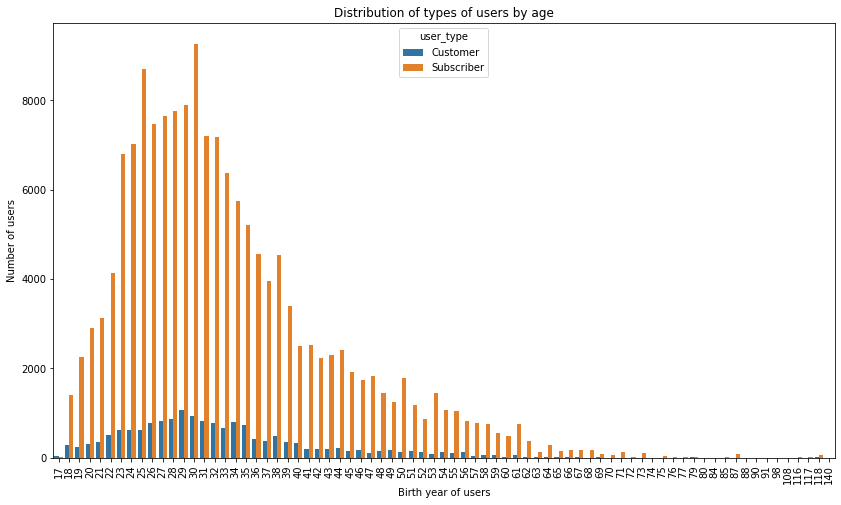

In [5]:
plt.figure(figsize =[14, 8])
sb.countplot(data = bikedata1, x= 'age', hue = 'user_type')
plt.xticks(rotation = 90)
plt.ylabel('Number of users')
plt.xlabel('Birth year of users')
plt.title('Distribution of types of users by age');

## DISTRIBUTION OF THE TRIP DURATION
### The distribution of the duration of the trip is unimodal and right skewed with a peak around 600s. 
### Minimum trip duration is 61s while the maximum is above 80,000s. 

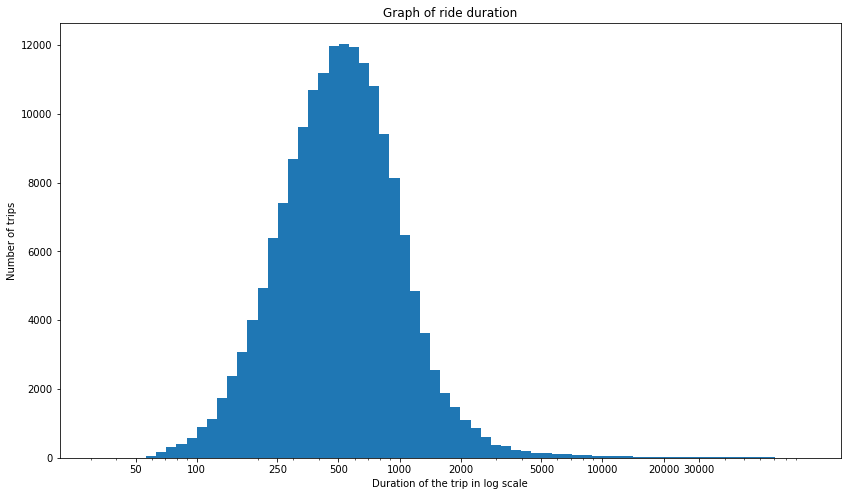

In [6]:
bins=10**(np.arange(1.5,5+0.05, 0.05))
ticks=[50, 100, 250, 500, 1e3, 2e3, 5e3, 1e4, 2e4, 3e4]
labels=[50,100, 250, 500, 1000, 2000, 5000, 10000, 20000, 30000]
plt.figure(figsize =[14,8])
plt.hist(data = bikedata1, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xlabel('Duration of the trip in log scale')
plt.ylabel('Number of trips')
plt.xticks(ticks,labels)
plt.title('Graph of ride duration');

In [7]:
def label1():
    label = [0,10,20,30,40,50,60,70,80,90, 100, 110, 120,130,140]
    ticks = np.arange(0, bikedata1['age'].max()+10, 10)
    x = plt.xlabel('Age of Customer')
    y = plt.ylabel('Duration of rides')
    z = g.set_titles('{col_name}')
    a = g.set_axis_labels('Age of User', 'Duration of the trip')
    return plt.xticks(ticks, label), g.fig.set_size_inches(14, 8), x, y,z,a

In [8]:
def label():
    x = plt.xlabel('Age of Customer')
    y = plt.ylabel('Duration of rides')
    return x,y

## DISTRIBUTION OF TRIP DURATION WITH AGE AND GENDER

### Male user between the age 20 and 55 tend to take longer trips the other two genders



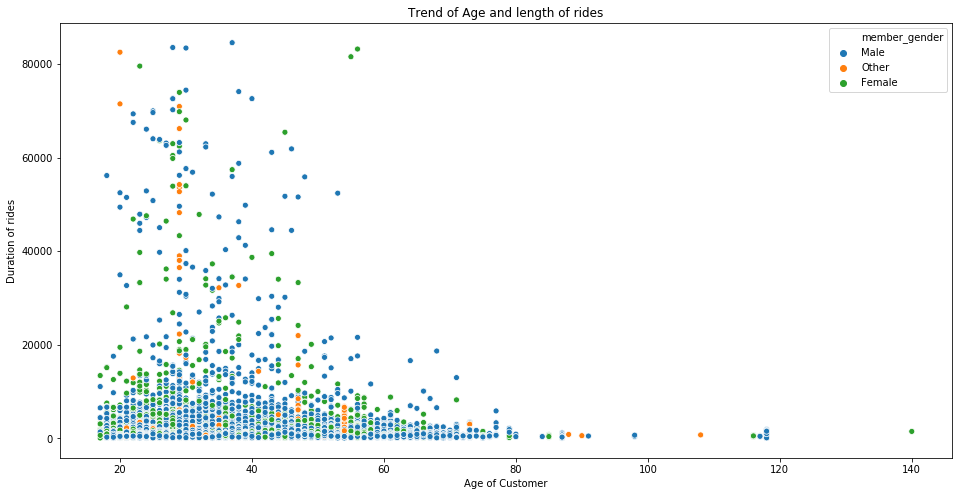

In [9]:
plt.figure(figsize =(16,8))
sb.scatterplot(data=bikedata1, x='age', y='duration_sec', hue ='member_gender')
plt.title('Trend of Age and length of rides')
label();

## DISTRIBUTION OF TRIPS DURING THE DAY
### The distribution of the number of rides by the starting hour is bimodal.
### The two peak period are 12:00 and 17:00 hours
### The rides with the lowest durations were recorded from 1am which gradually increases up to 10am

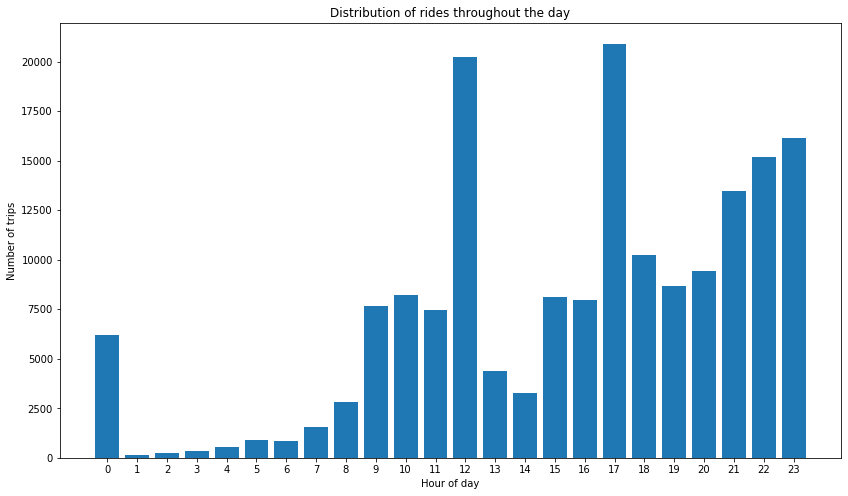

In [10]:
#bar chart of number of rides in each hour of the day
plt.figure(figsize =[14,8])
x = bikedata1.starthour.unique()
y = bikedata1.starthour.value_counts()
plt.bar(x, y)
plt.ylabel('Number of trips')
plt.xlabel('Hour of day')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
plt.title('Distribution of rides throughout the day');

## STATION ANALYSIS 
### The five most frequently used start stations are stations 58 with 3,647 trips, station 67 with 3408 trips, station 81 with 2952 trips, station 21 with 2711 trips and station 3 with 2620 trips
### Stations 58, 67 and 21 are of considerable importance since they are both frequently used start and stop locations

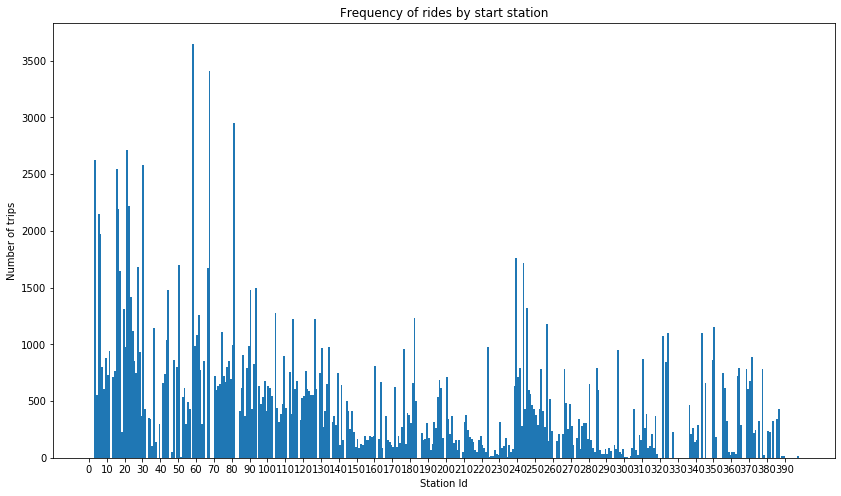

In [11]:
#checking the distribution of the trips by start stations 
plt.figure(figsize =[14,8])
bins = np.arange(0, bikedata1.start_station_id.max()+1, 1)
plt.hist(data = bikedata1, x ='start_station_id', bins=bins)
label = np.arange(0, bikedata1.start_station_id.max()+1, 10)
plt.xticks(label)
plt.xlabel('Station Id')
plt.ylabel('Number of trips')
plt.title('Frequency of rides by start station');

## DISTRIBUTION OF TRIP DURATION WITH USER TYPE AND THEIR AGE 

### The trend of duration of trip with age of the user does not significant differ across customer and subscribers however, duration of trips decreases with increasing age in both groups 

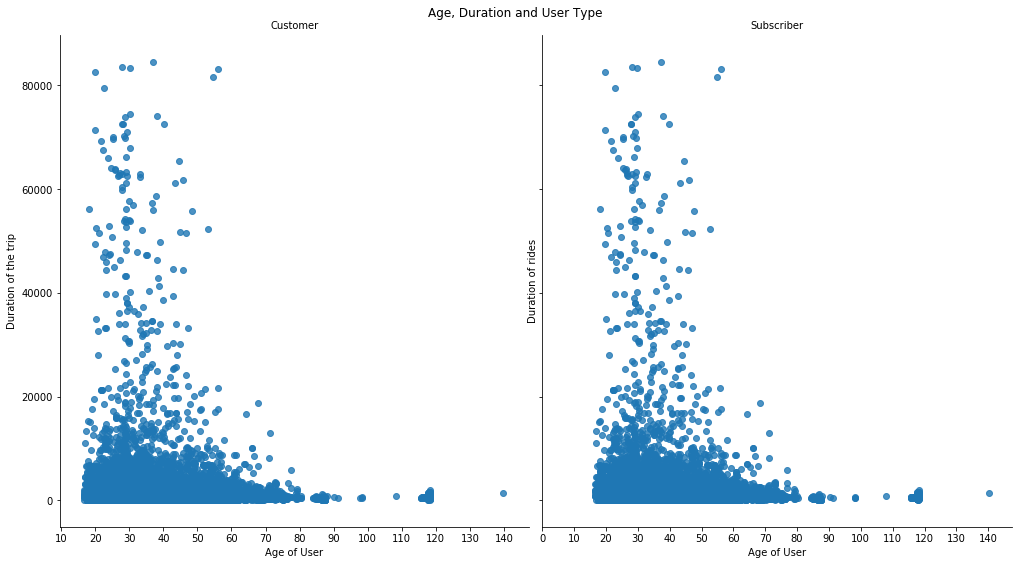

In [12]:
g = sb.FacetGrid(data = bikedata1, col ='user_type', height = 5, aspect = 1.5)
g.map(sb.regplot, data=bikedata1, x='age', y='duration_sec', fit_reg=False, x_jitter = 0.4)
label1()
plt.suptitle('Age, Duration and User Type ');

## DISTRIBUTION OF AGE, DURATION and BIKE SHARING AMONG USER

### The trend of duration of trip does not significant differ across sharing of trips. However, duration of trips decreases with increasing age in both groups. And younger riders are more likely to share bikes than older riders. 

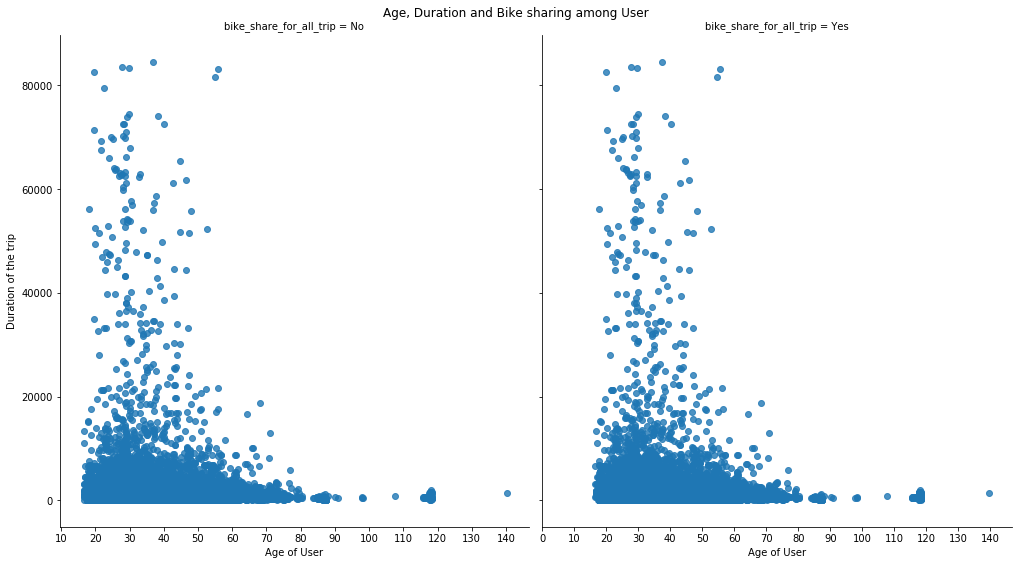

In [13]:
g = sb.FacetGrid(data = bikedata1, col ='bike_share_for_all_trip', height = 5, aspect = 1.5, margin_titles = True)
g.map(sb.regplot, data=bikedata1, x='age', y='duration_sec', fit_reg=False, x_jitter = 0.4)
g.set_titles('{col_name}')
g.set_axis_labels('Age of User', 'Duration of the trip')
g.fig.set_size_inches(14, 8)
label = [0,10,20,30,40,50,60,70,80,90, 100, 110, 120,130,140]
ticks = np.arange(0, bikedata1['age'].max()+10, 10)
plt.xticks(ticks, label)
plt.suptitle('Age, Duration and Bike sharing among User ');

## DISTRIBUTION OF AGE, DURATION, GENDER AND BIKE SHARING AMONG USER
### The trend of duration of trip does not significant differ across sharing of trips or gender. However, duration of trips decreases with increasing age in all categories.

In [14]:
## DISTRIBUTION OF AGE, DURATION, GENDER and BIKE SHARING AMONG USER
### The trend of duration of trip does not significant differ across sharing of trips. However, duration of trips decreases with increasing age in both groups. And younger riders are more likely to share bikes than older riders

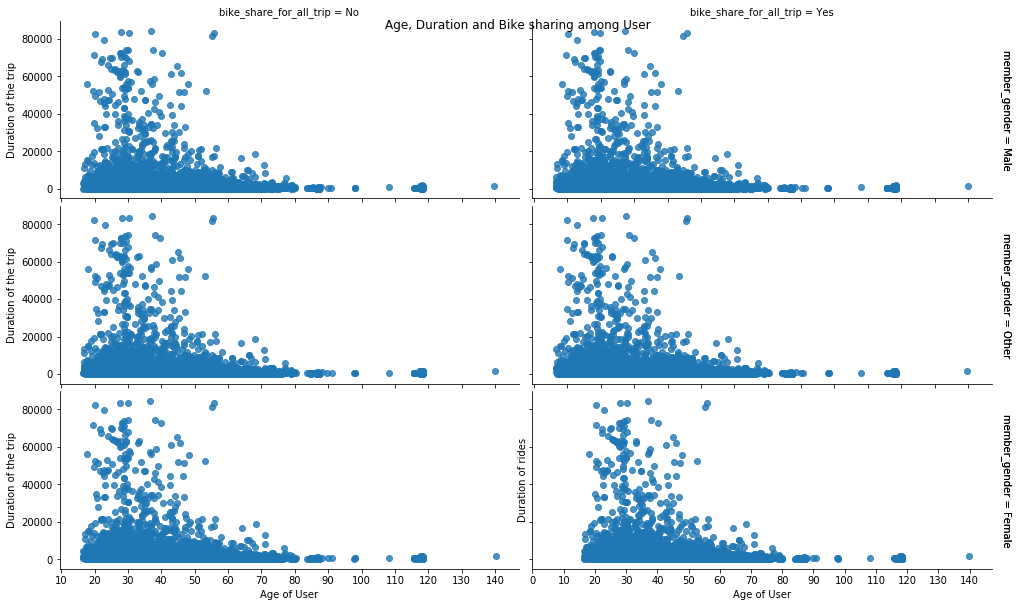

In [15]:
g = sb.FacetGrid(data = bikedata1, col ='bike_share_for_all_trip', row = 'member_gender', height = 5, aspect = 1.5,margin_titles =True)
g.map(sb.regplot, data=bikedata1, x='age', y='duration_sec', fit_reg=False, x_jitter = 0.4)
label1()
plt.suptitle('Age, Duration and Bike sharing among User');

# THANK YOU 